In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
import keras.datasets as tfds
from keras.datasets import fashion_mnist
#from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing import ImageDataGenerator,img_to_array,load_img

In [ ]:
#X = tfds.load('citrus_leaves')
import tensorflow_datasets as tfds
tfds.image_classification.CitrusLeaves

tensorflow_datasets.image_classification.citrus.CitrusLeaves

In [ ]:
(X_train, y_train), (X_test, y_test) = tfds.as_numpy(tfds.load('citrus_leaves', split = ['train[:78%]', 'train[-22%:]'], batch_size = -1, as_supervised = True))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/citrus_leaves/0.1.1.incompleteWTSVNV/citrus_leaves-train.tfrecord


  0%|          | 0/594 [00:00<?, ? examples/s]

Dataset citrus_leaves downloaded and prepared to /root/tensorflow_datasets/citrus_leaves/0.1.1. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
X_train.shape

(463, 256, 256, 3)

In [ ]:
X_test.shape

(131, 256, 256, 3)

Text(0.5, 1.0, 'Class: 1')

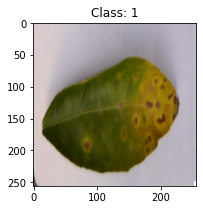

In [ ]:
# First image 
plt.figure(figsize = [3,3])
plt.imshow(X_train[0,:,:], cmap = 'gray')
plt.title("Class: {}".format(y_train[0]))

Preprocessing the data

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Applying one-hot encoding on class label
from tensorflow.keras.utils import to_categorical
y_train_ = to_categorical(y_train)
y_test_ = to_categorical(y_test)

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(256,256,3),padding='same'))
cnn.add(LeakyReLU(alpha=0.1))
cnn.add(MaxPooling2D((2, 2),padding='same'))
cnn.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
cnn.add(LeakyReLU(alpha=0.1))
cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
cnn.add(LeakyReLU(alpha=0.1))                  
cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn.add(Flatten())

cnn.add(Dense(128, activation='linear'))
cnn.add(LeakyReLU(alpha=0.1))                  
cnn.add(Dense(4, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

In [ ]:
cnn.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train_, batch_size= 25, epochs= 30, verbose=1)

Epoch 1/30
19/19 [==============================] - 14s 157ms/step - loss: 2.6155 - accuracy: 0.3067
Epoch 2/30
19/19 [==============================] - 2s 123ms/step - loss: 1.0369 - accuracy: 0.5292
Epoch 3/30
19/19 [==============================] - 2s 124ms/step - loss: 0.9213 - accuracy: 0.5918
Epoch 4/30
19/19 [==============================] - 2s 123ms/step - loss: 0.8093 - accuracy: 0.6652
Epoch 5/30
19/19 [==============================] - 2s 123ms/step - loss: 0.7930 - accuracy: 0.6609
Epoch 6/30
19/19 [==============================] - 2s 122ms/step - loss: 0.6370 - accuracy: 0.7322
Epoch 7/30
19/19 [==============================] - 2s 123ms/step - loss: 0.5349 - accuracy: 0.7840
Epoch 8/30
19/19 [==============================] - 2s 122ms/step - loss: 0.3401 - accuracy: 0.8834
Epoch 9/30
19/19 [==============================] - 2s 122ms/step - loss: 0.3677 - accuracy: 0.8618
Epoch 10/30
19/19 [==============================] - 2s 123ms/step - loss: 0.1742 - accuracy: 0.939

In [ ]:
test_eval = cnn.evaluate(X_test, y_test_, verbose=1)
print('Accuracy:', test_eval[1])

5/5 [==============================] - 1s 100ms/step - loss: 0.4940 - accuracy: 0.8855
Accuracy: 0.885496199131012
